In [1]:
# taken and modified from https://github.com/garg-aayush/building-from-scratch/blob/master/gpt-2/make-plots.ipynb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wandb

sns.set_style("darkgrid")

%matplotlib inline

In [2]:
# Initialize API
wandb_entity = "garg-aayush"
wandb_project = "bpe-tests"
run_names = ["gpt2-bpe-fineweb-16K", "gpt2-bpe-tiny-16K"]
cols_to_keep = ['step', 'val/bpb', 'val/hella_norm']


api = wandb.Api()
runs_path = f"{wandb_entity}/{wandb_project}"
print(f"Fetching from: {runs_path}")
    
runs = api.runs(runs_path)
    
# Filter runs if specified
if run_names:
    runs = [run for run in runs if run.name in run_names]
    
# Dictionary to store all data
all_histories = {}
    
    
for run in runs:
    print(f"\nProcessing: {run.name}")
    print(f"  Run ID: {run.id}")
    print(f"  State: {run.state}")
        
    # Fetch complete history
    print("  Fetching history...", end="", flush=True)
    history = run.history(samples=100000)  # Large number to get all samples
    print(f" Got {len(history)} datapoints")
        
    # Add metadata columns
    history['run_name'] = run.name
    history['run_id'] = run.id
        
    # Store in dictionary
    all_histories[run.name] = history
    
tinystoriesv2_df = all_histories['gpt2-bpe-tiny-16K']
fineweb_df = all_histories['gpt2-bpe-fineweb-16K']

wandb: Currently logged in as: garg-aayush to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Fetching from: garg-aayush/bpe-tests

Processing: gpt2-bpe-tiny-16K
  Run ID: vjm36mua
  State: finished
  Fetching history... Got 5000 datapoints

Processing: gpt2-bpe-fineweb-16K
  Run ID: jzatf74v
  State: finished
  Fetching history... Got 5000 datapoints


TinyStories Min BPB: 1.0195421432554446
FineWeb Min BPB: 1.0048305048491268
TinyStories Max HellaSwag: 0.2846046604262099
FineWeb Max HellaSwag: 0.2885879306910974

Plot saved to: ../images/bpe-comparison.png


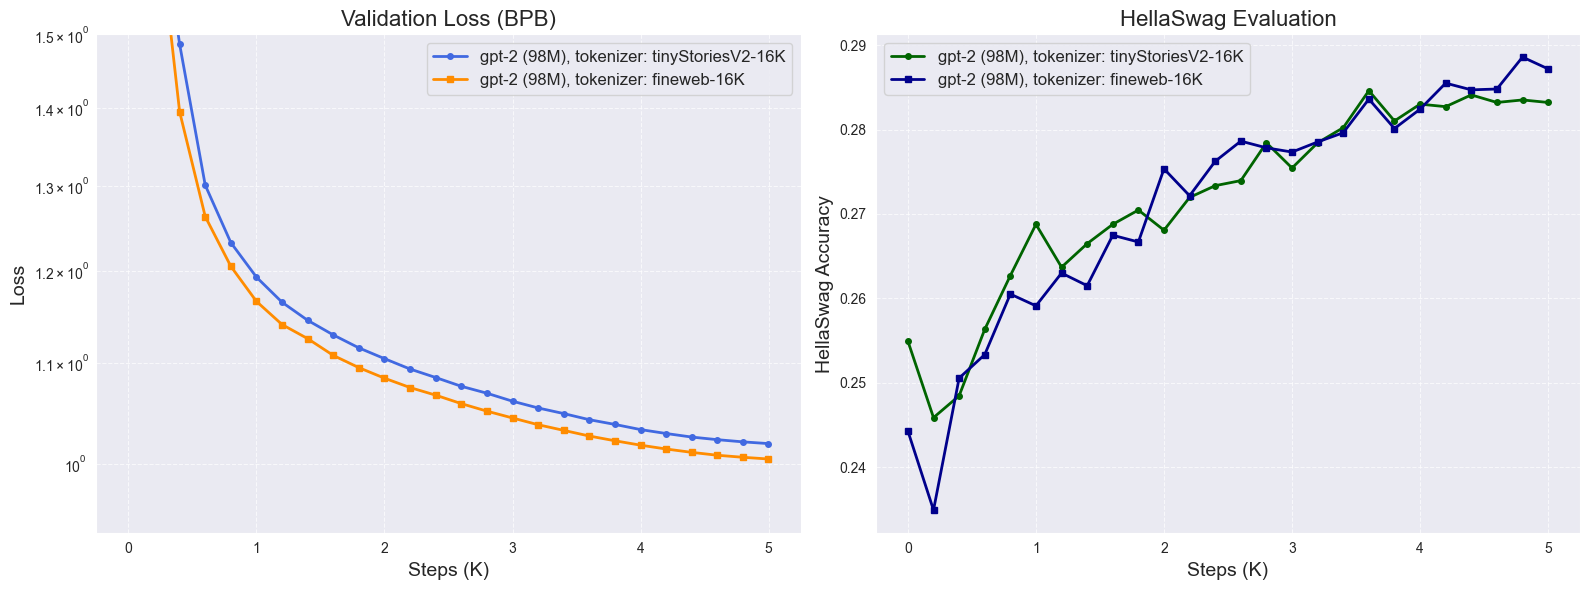

In [ ]:
# Create figure with two panels
plt.figure(figsize=(16, 6))

# Panel 1: Validation BPB (Bits Per Byte) Loss
plt.subplot(121)

# Filter out NaN values for TinyStories validation data
tiny_bpb_mask = tinystoriesv2_df["val/bpb"].notna()
xs_tiny = tinystoriesv2_df[tiny_bpb_mask]["step"]
ys_tiny = tinystoriesv2_df[tiny_bpb_mask]["val/bpb"]

# Filter out NaN values for FineWeb validation data
fineweb_bpb_mask = fineweb_df["val/bpb"].notna()
xs_fineweb = fineweb_df[fineweb_bpb_mask]["step"]
ys_fineweb = fineweb_df[fineweb_bpb_mask]["val/bpb"]

# Convert to numpy arrays
xs_tiny = np.array(xs_tiny)
xs_fineweb = np.array(xs_fineweb)
ys_tiny = np.array(ys_tiny)
ys_fineweb = np.array(ys_fineweb)

# Plot both runs
plt.plot(xs_tiny / 1000, ys_tiny, label='gpt-2 (98M), tokenizer: tinyStoriesV2-16K', color='royalblue', linewidth=2, marker='o', markersize=4)
plt.plot(xs_fineweb / 1000, ys_fineweb, label='gpt-2 (98M), tokenizer: fineweb-16K', color='darkorange', linewidth=2, marker='s', markersize=4)

print("TinyStories Min BPB:", min(ys_tiny))
print("FineWeb Min BPB:", min(ys_fineweb))

plt.xlabel("Steps (K)", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.yscale('log')
plt.ylim(top=1.5)
plt.legend(fontsize=12, loc='best')
plt.title("Validation Loss (BPB)", fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.7)

# Panel 2: HellaSwag Accuracy
plt.subplot(122)

# Filter out NaN values for TinyStories HellaSwag data
tiny_hella_mask = tinystoriesv2_df["val/hella_norm"].notna()
xs_tiny_hella = tinystoriesv2_df[tiny_hella_mask]["step"]
ys_tiny_hella = tinystoriesv2_df[tiny_hella_mask]["val/hella_norm"]

# Filter out NaN values for FineWeb HellaSwag data
fineweb_hella_mask = fineweb_df["val/hella_norm"].notna()
xs_fineweb_hella = fineweb_df[fineweb_hella_mask]["step"]
ys_fineweb_hella = fineweb_df[fineweb_hella_mask]["val/hella_norm"]

# Convert to numpy arrays
xs_tiny_hella = np.array(xs_tiny_hella)
xs_fineweb_hella = np.array(xs_fineweb_hella)
ys_tiny_hella = np.array(ys_tiny_hella)
ys_fineweb_hella = np.array(ys_fineweb_hella)

# Plot both runs
plt.plot(xs_tiny_hella / 1000, ys_tiny_hella, label='gpt-2 (98M), tokenizer: tinyStoriesV2-16K', color='darkgreen', linewidth=2, marker='o', markersize=4)
plt.plot(xs_fineweb_hella / 1000, ys_fineweb_hella, label='gpt-2 (98M), tokenizer: fineweb-16K', color='darkblue', linewidth=2, marker='s', markersize=4)

print("TinyStories Max HellaSwag:", max(ys_tiny_hella))
print("FineWeb Max HellaSwag:", max(ys_fineweb_hella))

plt.xlabel("Steps (K)", fontsize=14)
plt.ylabel("HellaSwag Accuracy", fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.title("HellaSwag Evaluation", fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()

# Save the plot
plt.savefig("../images/bpe-comparison.png", dpi=300, bbox_inches='tight')
print("\nPlot saved to: ../images/bpe-comparison.png")
plt.show()



TinyStories Min BPB: 1.0195421432554446
FineWeb Min BPB: 1.0048305048491268
TinyStories Max HellaSwag: 0.2846046604262099
FineWeb Max HellaSwag: 0.2885879306910974

Plot saved to: ../images/bpe-comparison-vertical.png


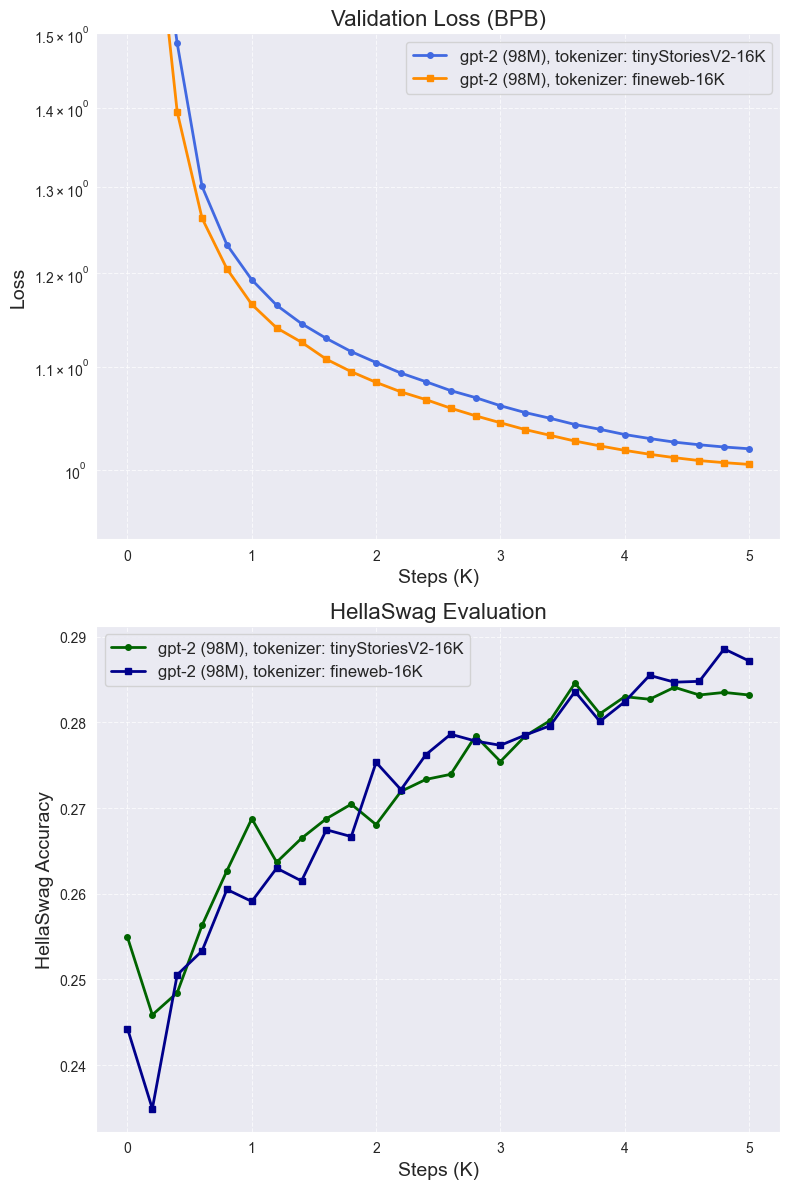

In [7]:
# Create figure with two panels
plt.figure(figsize=(8, 12))

# Panel 1: Validation BPB (Bits Per Byte) Loss
plt.subplot(211)

# Filter out NaN values for TinyStories validation data
tiny_bpb_mask = tinystoriesv2_df["val/bpb"].notna()
xs_tiny = tinystoriesv2_df[tiny_bpb_mask]["step"]
ys_tiny = tinystoriesv2_df[tiny_bpb_mask]["val/bpb"]

# Filter out NaN values for FineWeb validation data
fineweb_bpb_mask = fineweb_df["val/bpb"].notna()
xs_fineweb = fineweb_df[fineweb_bpb_mask]["step"]
ys_fineweb = fineweb_df[fineweb_bpb_mask]["val/bpb"]

# Convert to numpy arrays
xs_tiny = np.array(xs_tiny)
xs_fineweb = np.array(xs_fineweb)
ys_tiny = np.array(ys_tiny)
ys_fineweb = np.array(ys_fineweb)

# Plot both runs
plt.plot(xs_tiny / 1000, ys_tiny, label='gpt-2 (98M), tokenizer: tinyStoriesV2-16K', color='royalblue', linewidth=2, marker='o', markersize=4)
plt.plot(xs_fineweb / 1000, ys_fineweb, label='gpt-2 (98M), tokenizer: fineweb-16K', color='darkorange', linewidth=2, marker='s', markersize=4)

print("TinyStories Min BPB:", min(ys_tiny))
print("FineWeb Min BPB:", min(ys_fineweb))

plt.xlabel("Steps (K)", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.yscale('log')
plt.ylim(top=1.5)
plt.legend(fontsize=12, loc='best')
plt.title("Validation Loss (BPB)", fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.7)

# Panel 2: HellaSwag Accuracy
plt.subplot(212)

# Filter out NaN values for TinyStories HellaSwag data
tiny_hella_mask = tinystoriesv2_df["val/hella_norm"].notna()
xs_tiny_hella = tinystoriesv2_df[tiny_hella_mask]["step"]
ys_tiny_hella = tinystoriesv2_df[tiny_hella_mask]["val/hella_norm"]

# Filter out NaN values for FineWeb HellaSwag data
fineweb_hella_mask = fineweb_df["val/hella_norm"].notna()
xs_fineweb_hella = fineweb_df[fineweb_hella_mask]["step"]
ys_fineweb_hella = fineweb_df[fineweb_hella_mask]["val/hella_norm"]

# Convert to numpy arrays
xs_tiny_hella = np.array(xs_tiny_hella)
xs_fineweb_hella = np.array(xs_fineweb_hella)
ys_tiny_hella = np.array(ys_tiny_hella)
ys_fineweb_hella = np.array(ys_fineweb_hella)

# Plot both runs
plt.plot(xs_tiny_hella / 1000, ys_tiny_hella, label='gpt-2 (98M), tokenizer: tinyStoriesV2-16K', color='darkgreen', linewidth=2, marker='o', markersize=4)
plt.plot(xs_fineweb_hella / 1000, ys_fineweb_hella, label='gpt-2 (98M), tokenizer: fineweb-16K', color='darkblue', linewidth=2, marker='s', markersize=4)

print("TinyStories Max HellaSwag:", max(ys_tiny_hella))
print("FineWeb Max HellaSwag:", max(ys_fineweb_hella))

plt.xlabel("Steps (K)", fontsize=14)
plt.ylabel("HellaSwag Accuracy", fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.title("HellaSwag Evaluation", fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()

# Save the plot
plt.savefig("../images/bpe-comparison.png", dpi=300, bbox_inches='tight')
print("\nPlot saved to: ../images/bpe-comparison-vertical.png")
plt.show()

